<a href="https://colab.research.google.com/github/Neerajmn28/Data-Science-Projects/blob/main/Customer%20Churn%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: Predicting Customer Churn in a Telecom Company.

Client overview:  The goal of this project is to help a telecom company that is having a lot of trouble with client attrition. The business competes fiercely in its industry, and retaining customers is essential to preserving revenue and market share. In order to solve this, the telecom business aims to use data science to comprehend the causes of customer attrition and create efficient retention plans.

Project Objective:  Finding important insights into the causes influencing customer attrition and creating predictive models that reliably identify clients at risk of churn are the main goals of this investigation. The business may lower churn rates, raise customer happiness, and increase customer loyalty by identifying these trends and putting targeted interventions into place. As a result, the firm will be able to make data-driven decisions that maximize efforts to retain customers and enhance overall business success.

Description of the dataset:  Customer data, such as demographics, service consumption trends, contract specifics, billing information, and churn status, are included in the dataset used for this research. Tenure, monthly charges, total charges, contract type, internet service, and other service-related variables are among its many characteristics. This extensive dataset makes it possible to analyze consumer behavior in great detail and pinpoint the main causes of churn.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [56]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset contains 21 columns and 5 rows, here data.head() is used to just understand the overview of the data set to make an intial understanding.

## Data Exploration and Pre processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This dataset consists of no null values, meaning there is no need to replace any values.

In [4]:
data.shape

(7043, 21)

There are total 7043 rows and 21 columns, on which have to do rigorous analyses to form insights.

In [5]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


So, there are no null values in the dataset. Eliminating null values helps retain accuracy and prevents discrepancies during analyses, while erasing duplicate data improves overall precision towards insights and estimation by machine learning models.

In [6]:
print(f'Duplicate values: {data.duplicated().sum()}')

Duplicate values: 0


In [7]:
df = data.drop(columns = ['customerID']) # Dropping the unnecessary column

The customerID column does not offer useful information for analysis or building a machine learning model. Its removal reduces noise level, increases efficiency, and ensures that the model does not consider it as a feature.

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
print(df['gender'].unique())

['Female' 'Male']


In [10]:
print(df['SeniorCitizen'].unique())

[0 1]


In [67]:
df.rename(columns = {'tenure': 'Tenure'}, inplace = True) # Renaming the column

In [62]:
numerical_feature = ['Tenure','MonthlyCharges','TotalCharges']
for col in df.columns:
  if col not in numerical_feature:
    print(f'{col}: {df[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [1 0 2]
InternetService: [0 1 2]
OnlineSecurity: [0 2 1]
OnlineBackup: [2 0 1]
DeviceProtection: [0 2 1]
TechSupport: [0 2 1]
StreamingTV: [0 2 1]
StreamingMovies: [0 2 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
Churn: [0 1]


Even though there are no missing values, I could identify ' ' some empty strings. So, have to replace the empty string to some values.

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',0)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [59]:
for col in df.TotalCharges:
  if col == ' ':
    print(col)

This code is to check and confirm if there are any empty strings.

## Exploratory Data Analysis

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


* The majority of users are younger, with only 16.2% of customers being senior citizens
* The average monthly payment made by customers is 64.76, range from $18.25 to 118.75.

### Data Visualization

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Churn', data = df, palette = 'coolwarm')
plt.title('Churn Distribution')
plt.show()

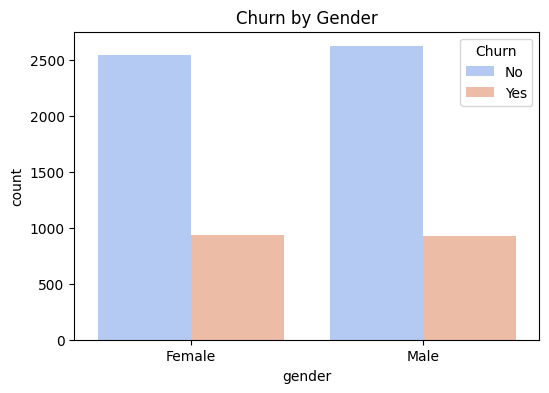

In [17]:
# Churn by Gender
plt.figure(figsize = (6,4))
sns.countplot(x = 'gender', hue = 'Churn', data = df, palette = 'coolwarm')
plt.title('Churn by Gender')
plt.show()

Compared to male customers, female customers have a higher churn rate. There were substantially more females who churned ("Yes") than males.

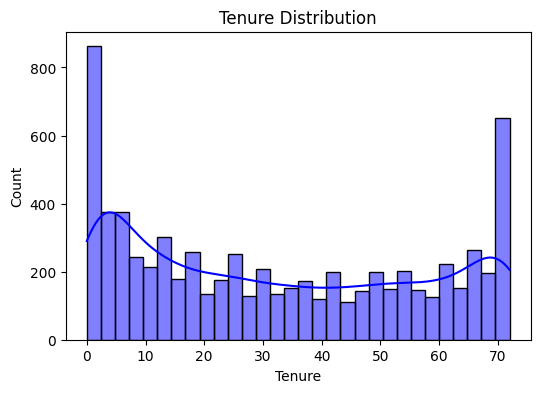

In [18]:
# Tenure Distribution
plt.figure(figsize = (6,4))
sns.histplot(df['Tenure'], bins = 30, kde = True, color = 'blue') # Kernel Density Estimate (KDE)
plt.title('Tenure Distribution')
plt.show()

The majority of customers (about 800) have been with the company for 0–10 months, which indicates that many of them are either new or leave early.

This might point to problems with early-stage retention initiatives, initial satisfaction, or onboarding.

After 10 months, the number drastically declines, with fewer clients remaining for 20–30 months (400–600).

This suggests that customers are more likely to be retained over the long term if they remain after the first year.

A loyal customer base is demonstrated by the small but consistent number of customers (200 or fewer) who stick around for 40–70 months.

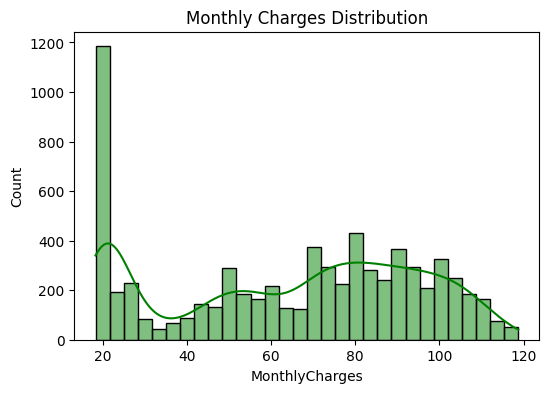

In [20]:
# Monthly Charges Distribution
plt.figure(figsize = (6,4))
sns.histplot(df['MonthlyCharges'], bins = 30, kde = True, color = 'green')
plt.title('Monthly Charges Distribution')
plt.show()

Peaks at around 20 and 80 indicate two main price tiers.

The decline at about $60 might be a sign of a shift in pricing strategy or fewer consumers choosing mid-range plans.

The largest group, consisting of approximately 1,200 customers, pays between

$20–40/month, probably indicating an affordable or entry-level service.

About 400 customers make up a smaller but important group that pays
$80–100 per month.

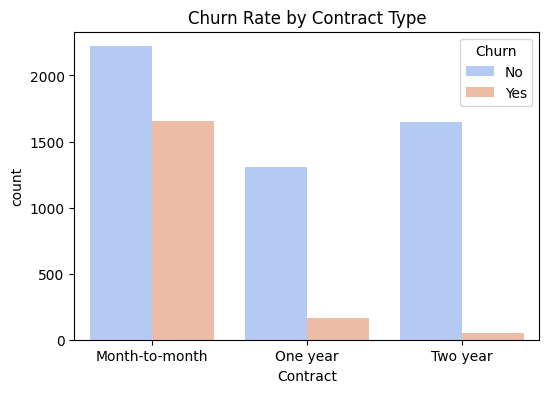

In [21]:
# Churn Rate by Contract Type
plt.figure(figsize = (6,4))
sns.countplot(x = 'Contract', hue = 'Churn', data = df, palette = 'coolwarm')
plt.title('Churn Rate by Contract Type')
plt.show()

The one-year and two-year contracts, suggesting that longer commitments result in higher customer retention.


Longer commitments result in higher customer retention, as evidenced by the lowest churn rates for two-year contracts.

Customers who churned in month to month contract are significantly higher, this implies that clients with short-term agreements are much more likely to terminate their memberships.

<ipython-input-22-c91809946a11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'gender', data = df, palette = "YlGnBu")


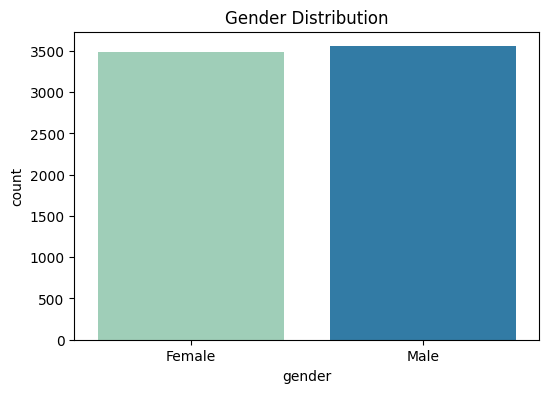

In [22]:
# Gender distribution
plt.figure(figsize = (6,4))
sns.countplot(x = 'gender', data = df, palette = "YlGnBu")
sns.set_style('darkgrid')
plt.title('Gender Distribution')
plt.show()

There is no notable disparity in the representation of the gender.

This implies that the company has a wide appeal to both gender or has effectively reached a diverse audience.

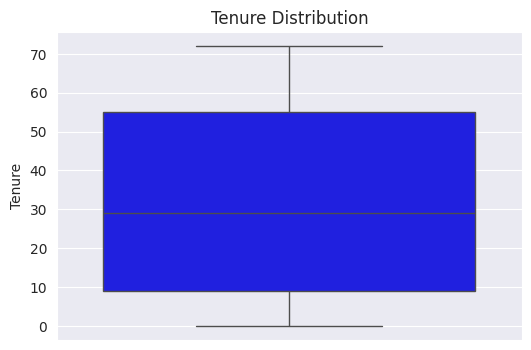

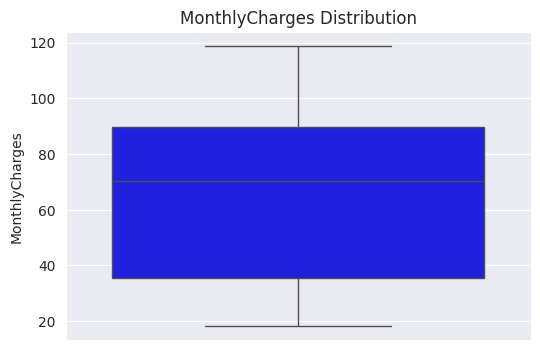

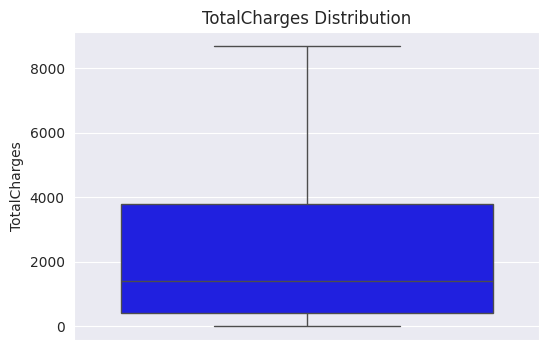

In [66]:
# Box plot
for feature in numerical_feature:
  plt.figure(figsize = (6,4))
  sns.boxplot(df[feature],color = 'blue')
  plt.title(f'{feature} Distribution')
  plt.show()

the "Tenure" distribution. The interquartile range (IQR), which displays the middle 50% of the tenure values, is represented by the blue box. The median tenure is indicated by the line inside the box. Excluding outliers, the whiskers extend to display the data's range. The boxplot displays a broad range of tenure values, with the longer upper whisker suggesting a slight right skewness.


The boxplot of "MonthlyCharges", reveals a comparatively centered pattern. The median charge, which represents a typical monthly expenditure, is approximately $70-$75. The interquartile range (IQR) suggests that the middle 50% of customers pay between approximately $35 and $90. A fairly even distribution with no notable outliers is implied by the box's symmetrical shape and the whiskers' balance.

The distribution of "TotalCharges" is displayed in this boxplot, which demonstrates a broad range and right-skewness. Many customers have lower charges, as indicated by the relatively low median.  A smaller group with noticeably higher total charges is suggested by the long upper whisker and possible outliers.

<ipython-input-24-f6059f22cc08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


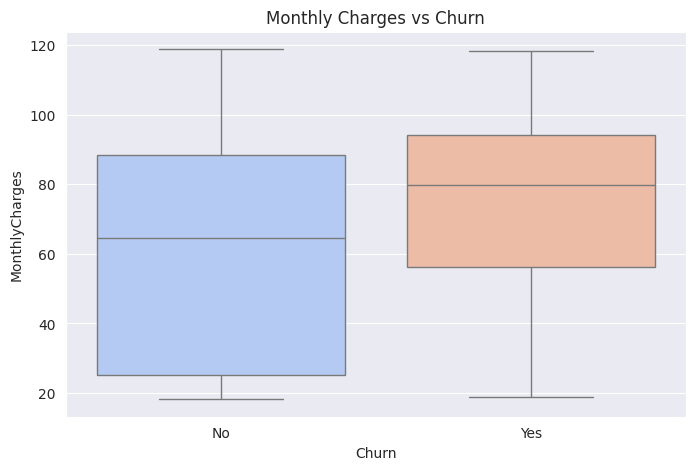

In [24]:
# Monthly Charges vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges vs Churn")
plt.show()

This boxplot shows, customers who churned typically had higher median monthly charges than those who did not.  Additionally, there is an upward shift in the IQR for churned customers, suggesting that a greater percentage of them pay higher monthly fees. This suggests a possible link between increased monthly fees and client attrition.

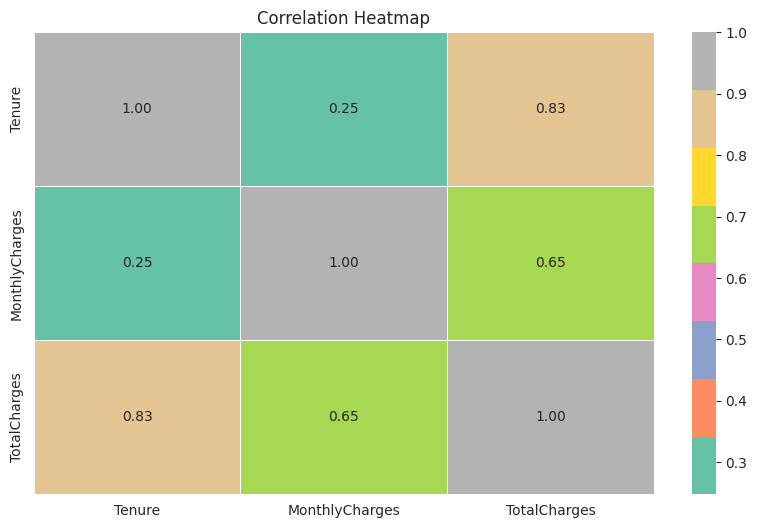

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Tenure','MonthlyCharges','TotalCharges']].corr(), annot = True, cmap = 'Set2', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap reveals a strong positive relationship between Tenure and TotalCharges, and a moderate positive relationship between MonthlyCharges and TotalCharges. The relationship between Tenure and MonthlyCharges is weak. This suggests that the total charges accumulated by customers are heavily influenced by their tenure and, to a lesser extent, by their monthly charges.  The weak correlation between tenure and monthly charges indicates that these two factors are relatively independent of each other.

## Feature Engineering

In [28]:
object_cols = df.select_dtypes(include = 'object').columns
print(object_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [29]:
encoder = LabelEncoder()
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

for item in label_cols:
  df[item] = encoder.fit_transform(df[item])

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Splitting the dataset to train and test

In [31]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

Segregating the independent variables and dependent variable for model building.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(y_train.shape)

(5634,)


In [34]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


There are substantially more non-churn (0) instances than churn (1) instances in the dataset, indicating a class imbalance.

# Over sampling the minority class using SMOTE

In [35]:
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [36]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [37]:
print(y_train_smote.shape)

(8276,)


In [38]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


## Model Building

In [39]:
log_ppl = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2', C=0.1, solver='liblinear'))  # Logistic Regression with L2 Regularization
])

In [40]:
log_ppl.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.1, solver='liblinear'))])

In [41]:
y_pred = log_ppl.predict(X_test)

In [42]:
# Checking model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



### Decision Tree Model

In [43]:
desc_tree_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))  # Decision Tree Classifier
])

In [44]:
desc_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=42))])

In [45]:
desc_tree_ypred = desc_tree_pipe.predict(X_test)

In [46]:
# Checking model performance
print(classification_report(y_test, desc_tree_ypred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



### Random Forest Model

In [47]:
random_forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

In [48]:
random_forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [49]:
rand_pred = random_forest_pipe.predict(X_test)

In [50]:
print(classification_report(y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



### XGBoost Model

In [51]:
XGB_boost_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42))
])

In [52]:
XGB_boost_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [53]:
XGB_pred = XGB_boost_pipe.predict(X_test)

In [54]:
print(classification_report(y_test, XGB_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



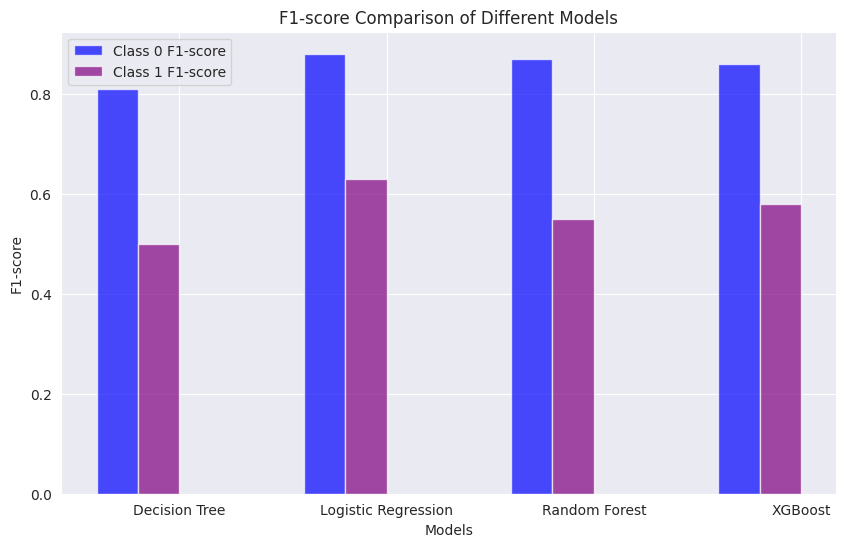

In [55]:
# Models and their F1-scores
models = ["Decision Tree", "Logistic Regression", "Random Forest", "XGBoost"]
f1_scores_0 = [0.81, 0.88, 0.87, 0.86]  # F1-score for class 0
f1_scores_1 = [0.50, 0.63, 0.55, 0.58]  # F1-score for class 1


x = np.arange(len(models))  # Label locations
width = 0.2  # Width of bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x - 1.5*width, f1_scores_0, width, label="Class 0 F1-score", color='blue', alpha=0.7)
ax.bar(x - 0.5*width, f1_scores_1, width, label="Class 1 F1-score", color='purple', alpha=0.7)

# Labels and title
ax.set_xlabel("Models")
ax.set_ylabel("F1-score")
ax.set_title("F1-score Comparison of Different Models")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

Random Forest and XGBoost provide a decent balance for both classes, whereas Logistic Regression is the model that performs the best for Class 0 classification.  Particularly for Class 1, the Decision Tree approach appears to be the least successful.   The disparity in F1-scores between Class 0 and Class 1 suggests that Class 1 may find the classification task more difficult, whether as a result of data imbalances or intrinsic class differences.




### Discussion

Several important insights into the elements driving customer attrition were obtained from the telecom company's examination of customer churn. Customers with month-to-month contracts had substantially higher turnover rates than those with longer-term contracts, according to our exploratory data study. This emphasizes how crucial it is to provide incentives for longer contract terms in order to increase client retention.

Furthermore, our research showed a link between higher monthly fees and higher attrition. Higher monthly fee paying customers were more likely to stop using the service. This implies that in order to guarantee client pleasure and lower attrition, pricing strategies and value propositions should be thoroughly assessed.

In terms of model performance, Random Forest and XGBoost provided a balanced performance across both churn and non-churn classes, however Logistic Regression showed good predictive capabilities. This implies that these models are useful instruments for anticipating client attrition and facilitating proactive retention tactics.

The disparity in F1-scores between the churn and non-attrition classes, however, emphasizes how difficult it is to predict customer churn with any degree of accuracy, especially for the minority churn class. In order to increase predicted accuracy, this emphasizes the necessity of more research into feature engineering and model optimization strategies.

## Conclusion


In summary, this study offers insightful information about the variables affecting telecom business customer attrition. Targeted retention methods can be implemented by the business to lower churn rates and increase client loyalty by addressing difficulties with contract types, pricing strategies, and initial customer happiness.

The proposed predictive models Logistic Regression, Random Forest, and XGBoost in particular provide useful instruments for spotting possible churners and facilitating preventative measures. These models can help the business allocate resources effectively and prioritize client retention initiatives.


To improve churn forecast accuracy, however, the difficulties posed by class imbalance underscore the necessity of continuous improvement of predictive models and investigation of cutting-edge methods.  The telecom firm may reduce churn risks and cultivate enduring customer connections by consistently observing customer behavior and improving retention tactics, which will ultimately lead to sustainable growth and profitability.